In [6]:
import uproot
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
from matplotlib import rc

# plt.rcParams['text.usetex'] = True
pd.set_option('use_inf_as_na', False)


def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)

    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
file = uproot.open("/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Sensor/output3.root")
# print(file.keys())
print(file['PhaseSpace'].keys())
file = uproot.open("/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Iso/output3.root")
# print(file.keys())
print(file['PhaseSpace'].keys())


[b'AtomicNumber', b'Ekine', b'Weight', b'Mass', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'ParticleName', b'ProductionVolume', b'CreatorProcess', b'ProcessDefinedStep', b'TrackID', b'ParentID', b'EventID', b'RunID', b'TOut', b'TProd']
[b'AtomicNumber', b'Ekine', b'Weight', b'Mass', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'ParticleName', b'ProductionVolume', b'CreatorProcess', b'ProcessDefinedStep', b'TrackID', b'ParentID', b'EventID', b'RunID', b'TOut', b'TProd']


In [8]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Sensor/output*.root",\
            "/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Iso/output*.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','ProductionVolume','Ekine','ParticleName'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Sensor/output*.root   

/work/lb8075/PhaseSpaces/PS1and2/P1and2_10x10_p1_Elec_Iso/output*.root   



In [9]:
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]
    data_frame_dict[files_g]['dZ']=np.sqrt(1-(pow(data_frame_dict[files_g]['dX'],2)+pow(data_frame_dict[files_g]['dY'],2)))
    data_frame_dict[files_g]['dXdY']=(data_frame_dict[files_g].dX**2+data_frame_dict[files_g].dY**2)**0.5
    ratioThetaXY=data_frame_dict[files_g].dXdY/data_frame_dict[files_g].dZ
    ratioThetaX=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    ratioThetaY=data_frame_dict[files_g].dY/data_frame_dict[files_g].dZ
    data_frame_dict[files_g]['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['XY']=(data_frame_dict[files_g].X**2+data_frame_dict[files_g].Y**2)**0.5

In [10]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    df=df[df['X']<150]
    df=df[df['X']>-150]
    df=df[df['Y']<150]
    df=df[df['Y']>-150]
    data_frame_dict[files_g]=df
    print(df.count())

X                   65306
Y                   65306
dX                  65306
dY                  65306
ProductionVolume    65306
Ekine               65306
ParticleName        65306
dZ                  65306
dXdY                65306
thetaXY             65306
thetaX              65306
thetaY              65306
XY                  65306
dtype: int64
X                   44314
Y                   44314
dX                  44314
dY                  44314
ProductionVolume    44314
Ekine               44314
ParticleName        44314
dZ                  44314
dXdY                44314
thetaXY             44314
thetaX              44314
thetaY              44314
XY                  44314
dtype: int64


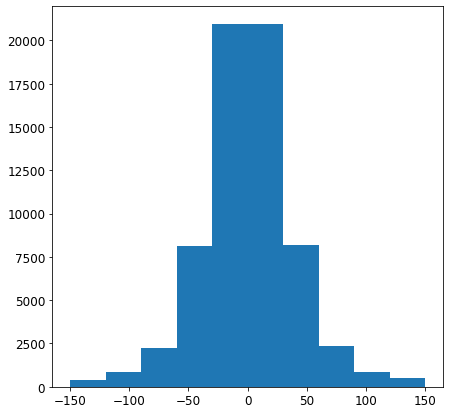

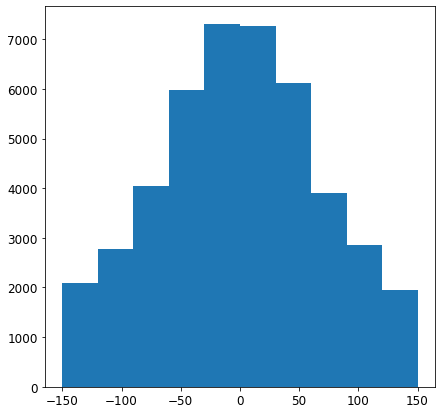

In [11]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    plt.figure(figsize=(7,7))
    plt.hist(df['X'])
    plt.show()

<ipython-input-15-c99fc66eceb8>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'],density=True,histtype='step',bins=(80),label=name)
<ipython-input-15-c99fc66eceb8>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'],density=True,histtype='step',bins=(80),label=name)
<ipython-input-15-c99fc66eceb8>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'],density=True,histtype='step',bins=(80),label=name)
<ipython-input-15-c99fc66eceb8>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'],density=True,histtype='step',bins=(80),label=name)
<ipython-input-15-c99fc6

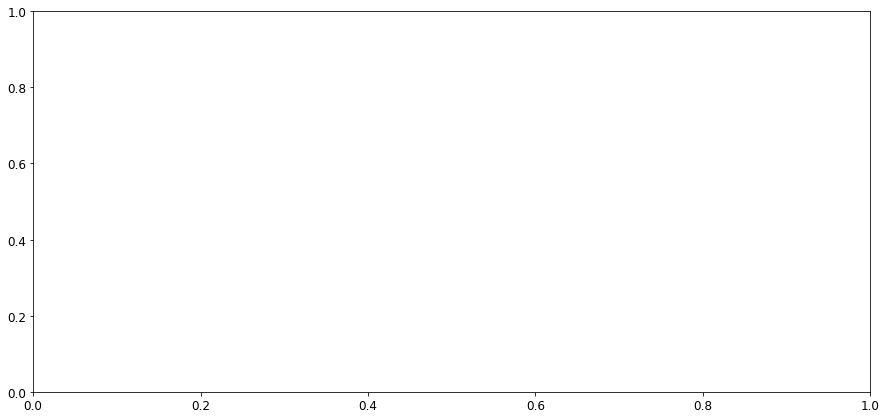

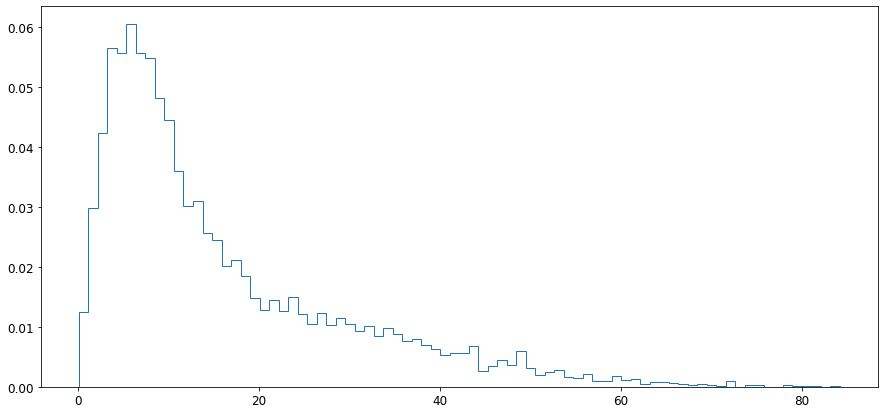

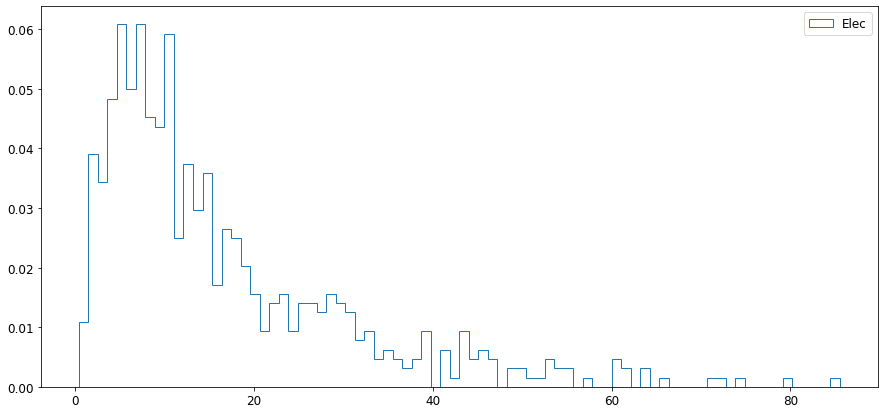

In [15]:
fig,ax=plt.subplots(1,1,figsize=(15,7))

for files_g in filenames_g:
    if "Gamma" in files_g:
        continue
    fig,ax=plt.subplots(1,1,figsize=(15,7))

    name=files_g.split("/")[5]
    name=name.split("_")[3]
    df=data_frame_dict[files_g]
    y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'],density=True,histtype='step',bins=(80),label=name)

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()
fig.savefig("Phase1and2_Ekine_all.png")

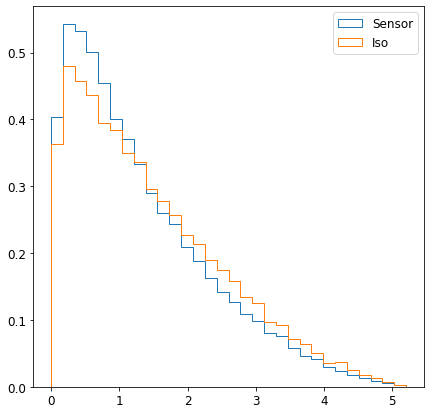

In [5]:
fig,ax=plt.subplots(figsize=(7,7))

for j,files_g in enumerate(filenames_g):
    area=files_g.split('/')[4].split('_')[4]

    df=data_frame_dict[files_g]
    ax.hist(df['Ekine'],bins=30,histtype='step',density=True,range=(0,5.2),label=area)
plt.legend()
plt.show()

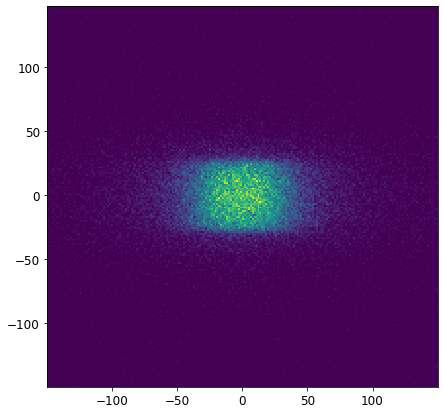

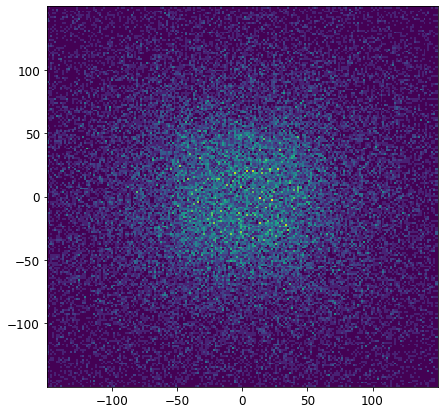

In [6]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    plt.figure(figsize=(7,7))

    hist=plt.hist2d(df['X'],df['Y'],bins=(200,200)) #range=[[-100,100],[-100,100]]
    plt.show()


In [ ]:
# # index = ['Air', 'Back Scatter Plate', 'X jaws',
# #          'MLC', 'Flattening Filter', 'Y jaws', 'Other']

# width = 0.35       # the width of the bars

# fig, ax = plt.subplots(figsize=(16,5))

# for j,files_g in enumerate(filenames_g):
#     df=data_frame_dict[files_g]
#     df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     df.loc[df['ProductionVolume'].str.contains('mlc_y'),["ProductionVolume"]]="MLC"
#     df.loc[df['ProductionVolume'].str.contains('jaws_x1_'),["ProductionVolume"]]="X Jaws"
#     df.loc[df['ProductionVolume'].str.contains('jaws_x2_'),["ProductionVolume"]]="X Jaws"
#     df.loc[df['ProductionVolume'].str.contains('jaws_y1_'),["ProductionVolume"]]="Y Jaws"
#     df.loc[df['ProductionVolume'].str.contains('jaws_y2_'),["ProductionVolume"]]="Y Jaws"
#     df.loc[df['ProductionVolume'].str.contains('target_sup'),["ProductionVolume"]]="Other"
#     df.loc[df['ProductionVolume'].str.contains('primar'),["ProductionVolume"]]="Other"
#     df.loc[df['ProductionVolume'].str.contains('mirror'),["ProductionVolume"]]="Other"
#     df.loc[df['ProductionVolume'].str.contains('ioniz'),["ProductionVolume"]]="Other"
#     df.loc[df['ProductionVolume'].str.contains('back_scat'),["ProductionVolume"]]="Back Scatter Plate"
#     df.loc[df['ProductionVolume'].str.contains('flat'),["ProductionVolume"]]="Flattening Filter"
    
#     abc=df['ProductionVolume'].value_counts().values
#     ind = np.arange(abc.size)  # the x locations for the groups

#     area=files_g.split('/')[4].split('_')[4]
# #     df["ProductionVolume"].value_counts().plot.bar()    
#     print(ind.size)

#     ax.bar(ind+j*width,df["ProductionVolume"].value_counts().values,width,label=area)
    
# ax.set_xticklabels(df["ProductionVolume"].value_counts().index)
# ax.set_xticks(ind + width / 2)
# ax.set_ylabel("Particles produced in volumes")
# ax.legend()

In [7]:
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]

    df['ProductionVolume']=df['ProductionVolume'].astype('str')
    df.loc[df['ProductionVolume'].str.contains('mlc_y'),["ProductionVolume"]]="MLC"
    df.loc[df['ProductionVolume'].str.contains('jaws_x1_'),["ProductionVolume"]]="X Jaws"
    df.loc[df['ProductionVolume'].str.contains('jaws_x2_'),["ProductionVolume"]]="X Jaws"
    df.loc[df['ProductionVolume'].str.contains('jaws_y1_'),["ProductionVolume"]]="Y Jaws"
    df.loc[df['ProductionVolume'].str.contains('jaws_y2_'),["ProductionVolume"]]="Y Jaws"
    df.loc[df['ProductionVolume'].str.contains('world'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('linac_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('mlc_leaf_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('mlc_system_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('jaws_x1Vol_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('jaws_x2Vol_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('jaws_y1Vol_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('jaws_y2Vol_log'),["ProductionVolume"]]="Air"
    df.loc[df['ProductionVolume'].str.contains('back_scat'),["ProductionVolume"]]="Back Scatter Plate"
    df.loc[df['ProductionVolume'].str.contains('flat'),["ProductionVolume"]]="Flattening Filter"
    df.loc[df['ProductionVolume'].str.contains('target_sup'),["ProductionVolume"]]="Other"
    df.loc[df['ProductionVolume'].str.contains('primar'),["ProductionVolume"]]="Other"
    df.loc[df['ProductionVolume'].str.contains('mirror'),["ProductionVolume"]]="Other"
    df.loc[df['ProductionVolume'].str.contains('ioniz'),["ProductionVolume"]]="Other"


In [8]:
abc=df['ProductionVolume'].value_counts()
abc.size

7

In [10]:
vals={}
indices={}
for j,files_g in enumerate(filenames_g):
    
    df=data_frame_dict[files_g]
    sub=df['ProductionVolume'].value_counts()
    sub=sub.reindex(index = ['Air', 'Back Scatter Plate', 'X Jaws', 'MLC', 'Flattening Filter', 'Y Jaws','Other'])
#     data_frame_dict[files_g]=df
    print(sub.values,sub.index)
    vals[files_g]=sub.values
    indices[files_g]=sub.index

[14600 27228 15220  5184  1642   948   484] Index(['Air', 'Back Scatter Plate', 'X Jaws', 'MLC', 'Flattening Filter',
       'Y Jaws', 'Other'],
      dtype='object')
[25421 15388  1234  1041   918    95   217] Index(['Air', 'Back Scatter Plate', 'X Jaws', 'MLC', 'Flattening Filter',
       'Y Jaws', 'Other'],
      dtype='object')


Index(['Air', 'Back Scatter Plate', 'X Jaws', 'MLC', 'Flattening Filter',
       'Y Jaws', 'Other'],
      dtype='object')
Index(['Air', 'Back Scatter Plate', 'X Jaws', 'MLC', 'Flattening Filter',
       'Y Jaws', 'Other'],
      dtype='object')


<ipython-input-11-c53217397e52>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(indices[files_g])


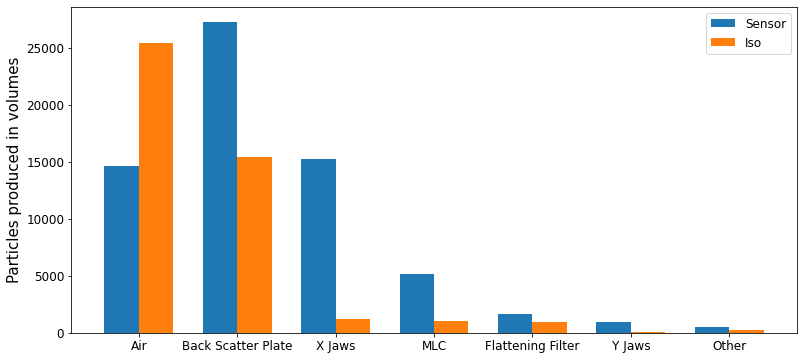

In [11]:
# index = ['Air', 'Back Scatter Plate', 'X jaws',
#          'MLC', 'Flattening Filter', 'Y jaws', 'Other']

ind = np.arange(abc.size)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(13,6))

for j,files_g in enumerate(filenames_g):
    
    df=data_frame_dict[files_g]
    area=files_g.split('/')[4].split('_')[4]

    print(indices[files_g])
    ax.bar(ind+j*width,vals[files_g],width,label=area)
    
ax.set_xticklabels(indices[files_g])
ax.set_xticks(ind + width / 2)
ax.set_ylabel("Particles produced in volumes")
ax.legend()
plt.savefig('ProductionVolumes.png')

In [ ]:
ind = np.arange(abc.size)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(13,6))

for j,files_g in enumerate(filenames_g):
    
    df=data_frame_dict[files_g]
    area=files_g.split('/')[4].split('_')[4]
    normval=vals[files_g]/(vals[files_g].sum())
    print(indices[files_g])
    ax.bar(ind+j*width,normval,width,label=area)
    
ax.set_xticklabels(indices[files_g])
ax.set_xticks(ind + width / 2)
ax.set_ylabel("Particles produced in volumes")
ax.legend()
plt.savefig('ProductionVolumes_norm.png')

In [ ]:
import gc
gc.collect()